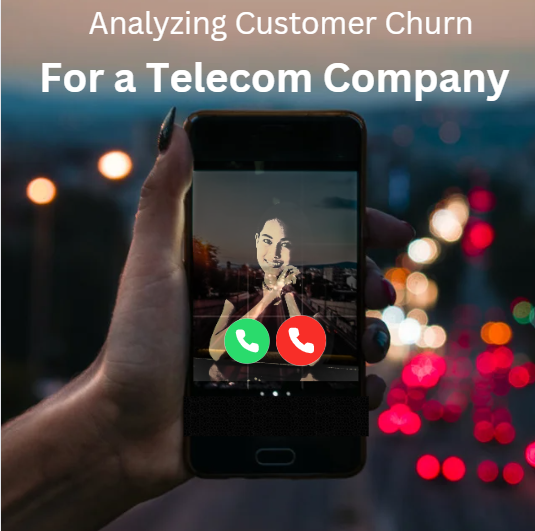

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telecom = pd.read_excel('telco_churn.xlsx')
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
telecom.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [56]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [57]:
telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<h3 style="color: orange">Analyzing Trends for Customers buying Streaming Services</h3>

In [58]:

telecom['streaming'] = (telecom['StreamingMovies'] == 'Yes') | (telecom['StreamingTV'] == 'Yes')

telecom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,streaming
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,False
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,True
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,True
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,False
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,False


In [59]:
telecom['streaming'].value_counts()

streaming
False    3544
True     3499
Name: count, dtype: int64

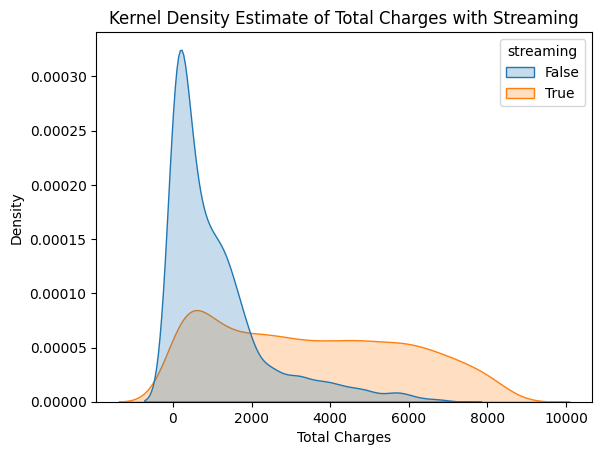

In [60]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')

# Drop rows with NaN values in 'TotalCharges' column
telecom.dropna(subset=['TotalCharges'], inplace=True)


sns.kdeplot(data=telecom, x='TotalCharges', hue='streaming', fill=True)


plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Total Charges with Streaming')


plt.show()


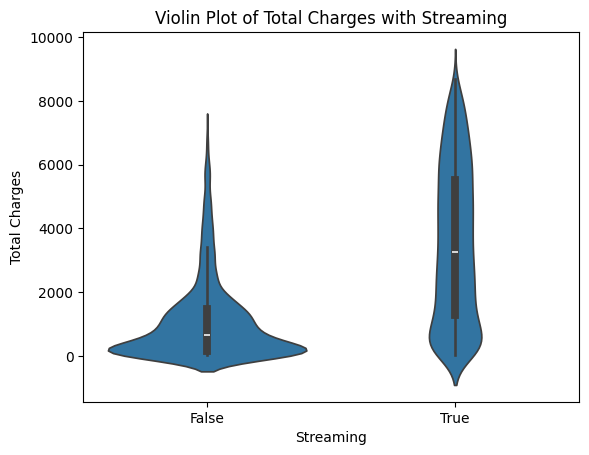

In [61]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')


telecom.dropna(subset=['TotalCharges'], inplace=True)


sns.violinplot(data=telecom, x='streaming', y='TotalCharges')


plt.xlabel('Streaming')
plt.ylabel('Total Charges')
plt.title('Violin Plot of Total Charges with Streaming')


plt.show()


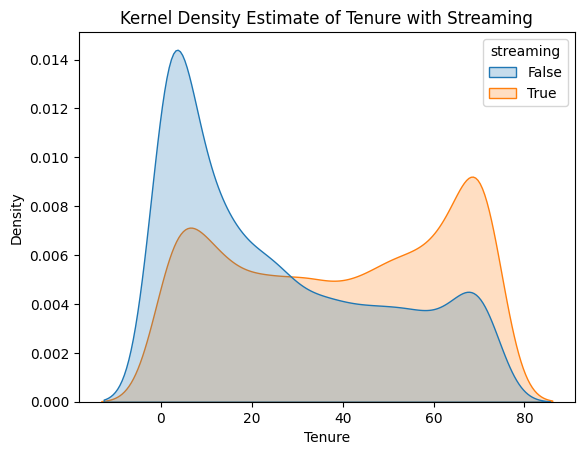

In [62]:
# Plotting the KDE plot with 'hue' parameter
sns.kdeplot(data=telecom, x='tenure', hue='streaming', fill=True)

# Adding labels and title
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Tenure with Streaming')

# Displaying the plot
plt.show()


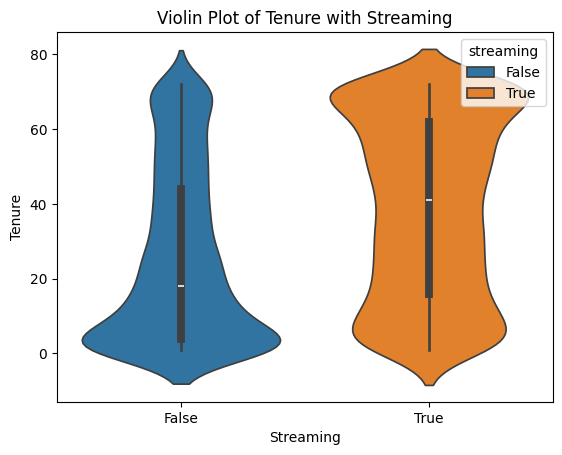

In [63]:
sns.violinplot(data=telecom, x='streaming', y='tenure', hue='streaming', fill=True)

plt.xlabel('Streaming')
plt.ylabel('Tenure')
plt.title('Violin Plot of Tenure with Streaming')

plt.show()

In voilin plot: 

The length of the plot represents the range of values on the y-axis.

The width of the plot represents the data distribution for values on the x-axis.

Customers who buy Streaming Services have a Higher Tenure Period.

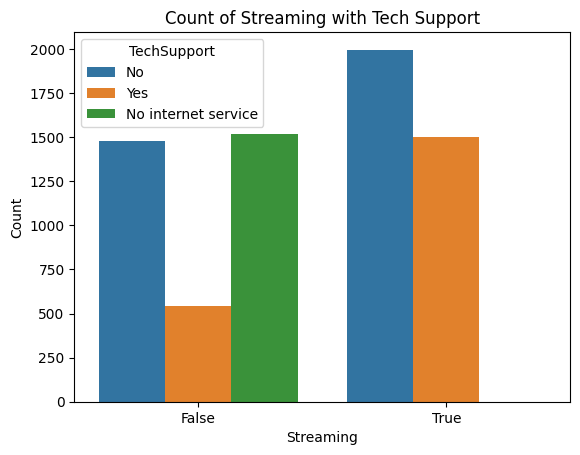

In [64]:
sns.countplot(data=telecom, x='streaming', hue='TechSupport')

# Adding labels and title
plt.xlabel('Streaming')
plt.ylabel('Count')
plt.title('Count of Streaming with Tech Support')

# Displaying the plot
plt.show()


People opting for Streaming Services tend to use Tech Support by a significant margin.

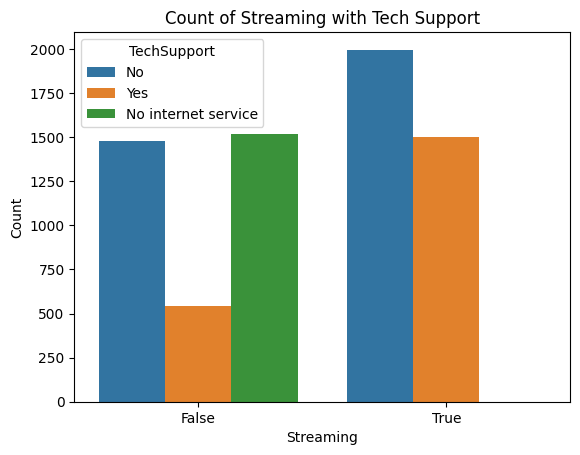

In [65]:
sns.countplot(data=telecom, x='streaming', hue='TechSupport')

# Adding labels and title
plt.xlabel('Streaming')
plt.ylabel('Count')
plt.title('Count of Streaming with Tech Support')

# Displaying the plot
plt.show()

<h3 style="color: orange">Customer Segmentation by Contract Type</h3>

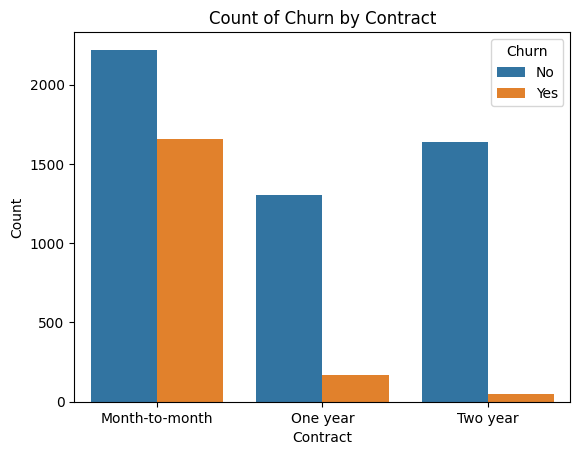

In [66]:

# Convert boolean columns to categorical
telecom['Contract'] = telecom['Contract'].astype('category')
telecom['Churn'] = telecom['Churn'].astype('category')

# Plotting the countplot
sns.countplot(data=telecom, x='Contract', hue='Churn')

# Adding labels and title
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Count of Churn by Contract')

# Displaying the plot
plt.show()


Churn Rate is highest for month - to -month customers.

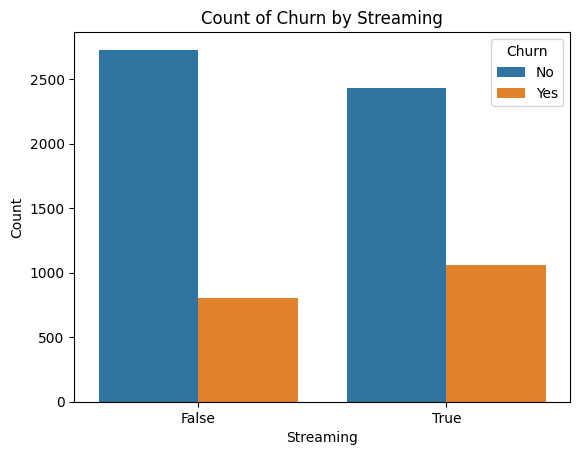

In [67]:

# Convert boolean columns to categorical
telecom['streaming'] = telecom['streaming'].astype('category')
telecom['Churn'] = telecom['Churn'].astype('category')

# Plotting the countplot
sns.countplot(data=telecom, x='streaming', hue='Churn')

# Adding labels and title
plt.xlabel('Streaming')
plt.ylabel('Count')
plt.title('Count of Churn by Streaming')

# Displaying the plot
plt.show()


Customers who buy Streaming Services have a Higer Churn Rate.

<h3 style="color: orange">Customer Segmentation of Streaming Service Buyers</h3>

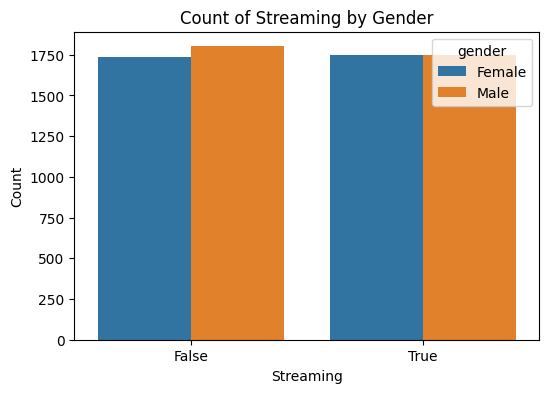

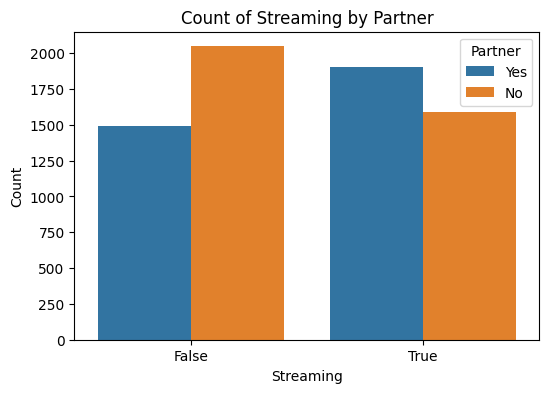

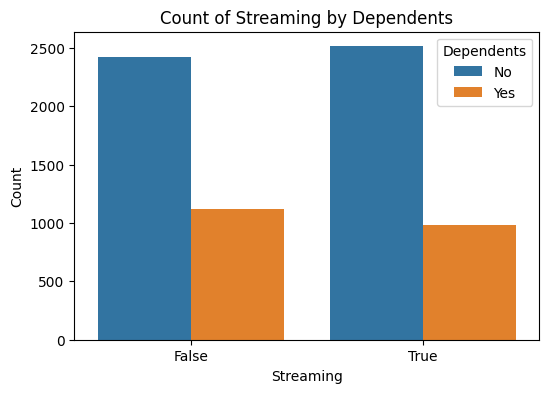

In [68]:
# Plotting the countplot for gender
plt.figure(figsize=(6, 4))
sns.countplot(data=telecom, x='streaming', hue='gender')
plt.title('Count of Streaming by Gender')
plt.xlabel('Streaming')
plt.ylabel('Count')
plt.show()

# Plotting the countplot for Partner
plt.figure(figsize=(6, 4))
sns.countplot(data=telecom, x='streaming', hue='Partner')
plt.title('Count of Streaming by Partner')
plt.xlabel('Streaming')
plt.ylabel('Count')
plt.show()

# Plotting the countplot for Dependents
plt.figure(figsize=(6, 4))
sns.countplot(data=telecom, x='streaming', hue='Dependents')
plt.title('Count of Streaming by Dependents')
plt.xlabel('Streaming')
plt.ylabel('Count')
plt.show()



<h4> Customers tend to buy more Streaming Services :</h4>

1. With No Dependents
2. With Partners 
3. Females (by a very small margin)

<h3 style="color: orange">Customer Segmentation based on Service Type</h3>

<Axes: xlabel='PhoneService'>

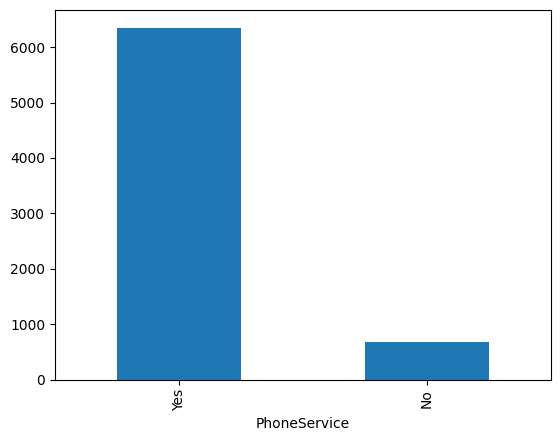

In [69]:
telecom['PhoneService'].value_counts().plot.bar()
#telecom['MultipleLines'].value_counts()
#telecom['streaming'].value_counts()


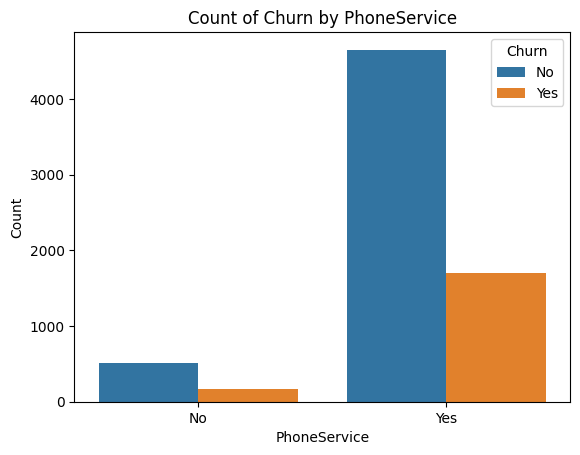

In [70]:

# Convert boolean columns to categorical
telecom['PhoneService'] = telecom['PhoneService'].astype('category')
telecom['Churn'] = telecom['Churn'].astype('category')

# Plotting the countplot
sns.countplot(data=telecom, x='PhoneService', hue='Churn')

# Adding labels and title
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.title('Count of Churn by PhoneService')

# Displaying the plot
plt.show()


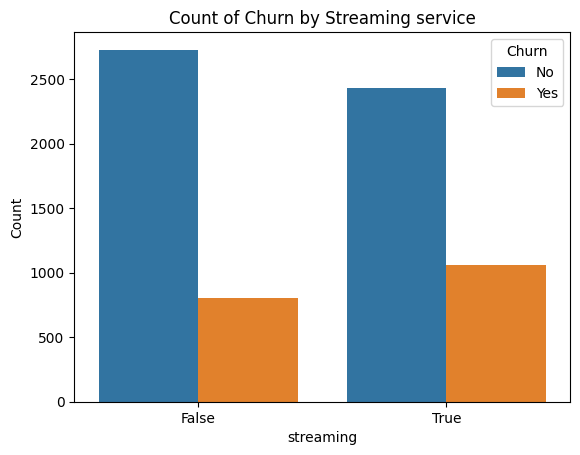

In [71]:
# Convert boolean columns to categorical
#telecom['streaming'] = telecom['streaming'].astype('category')
#telecom['Churn'] = telecom['Churn'].astype('category')

# Plotting the countplot
sns.countplot(data=telecom, x='streaming', hue='Churn')

# Adding labels and title
plt.xlabel('streaming')
plt.ylabel('Count')
plt.title('Count of Churn by Streaming service')

# Displaying the plot
plt.show()


In [72]:
[group for group in telecom.groupby(['PhoneService','streaming','MultipleLines']).groups.keys()]

C:\Users\zahra hussain\AppData\Local\Temp\ipykernel_5108\27190182.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  [group for group in telecom.groupby(['PhoneService','streaming','MultipleLines']).groups.keys()]


[('No', False, 'No phone service'),
 ('No', True, 'No phone service'),
 ('Yes', False, 'No'),
 ('Yes', False, 'Yes'),
 ('Yes', True, 'No'),
 ('Yes', True, 'Yes')]

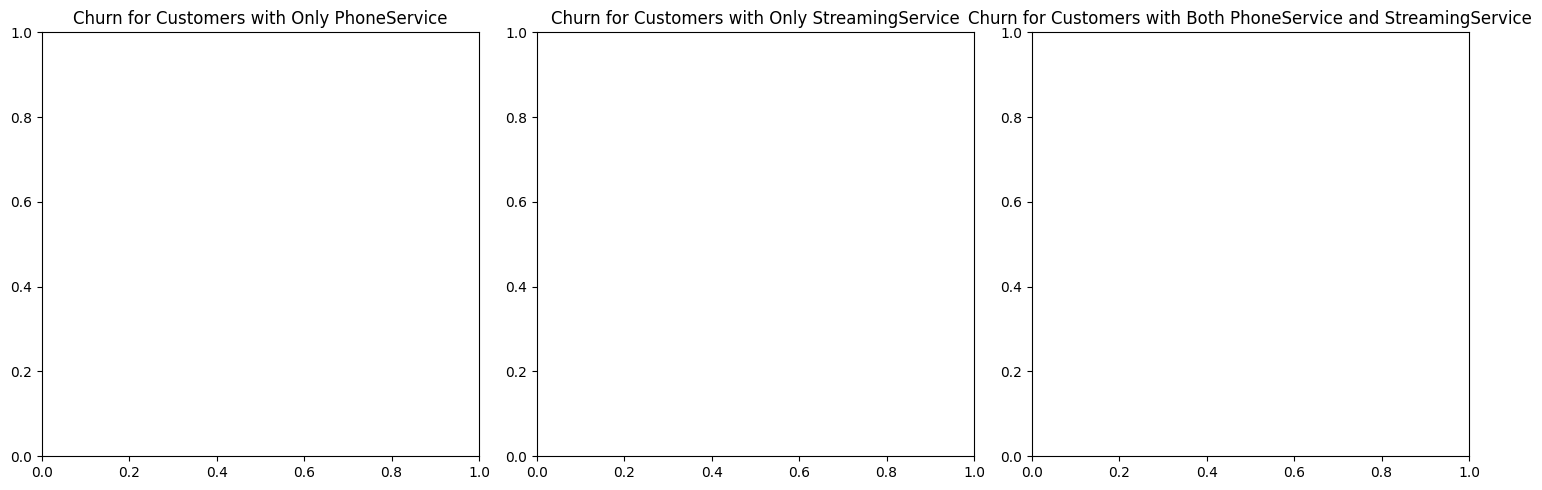

In [77]:


telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})


phone_yes_stream_no = telecom[(telecom['PhoneService'] == 'Yes') & (telecom['streaming'] == 0)]
phone_no_stream_yes = telecom[(telecom['PhoneService'] == 'No') & (telecom['streaming'] == 1)]
phone_yes_stream_yes = telecom[(telecom['PhoneService'] == 'Yes') & (telecom['streaming'] == 1)]


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=phone_yes_stream_no, x='PhoneService', hue='Churn')
plt.title('Churn for Customers with Only PhoneService')

plt.subplot(1, 3, 2)
sns.countplot(data=phone_no_stream_yes, x='streaming', hue='Churn')
plt.title('Churn for Customers with Only StreamingService')

plt.subplot(1, 3, 3)
sns.countplot(data=phone_yes_stream_yes, x='streaming', hue='Churn')
plt.title('Churn for Customers with Both PhoneService and StreamingService')

plt.tight_layout()
plt.show()


Churn is lower for Customers opting for Streaming Services compared to only Phone Services Customers

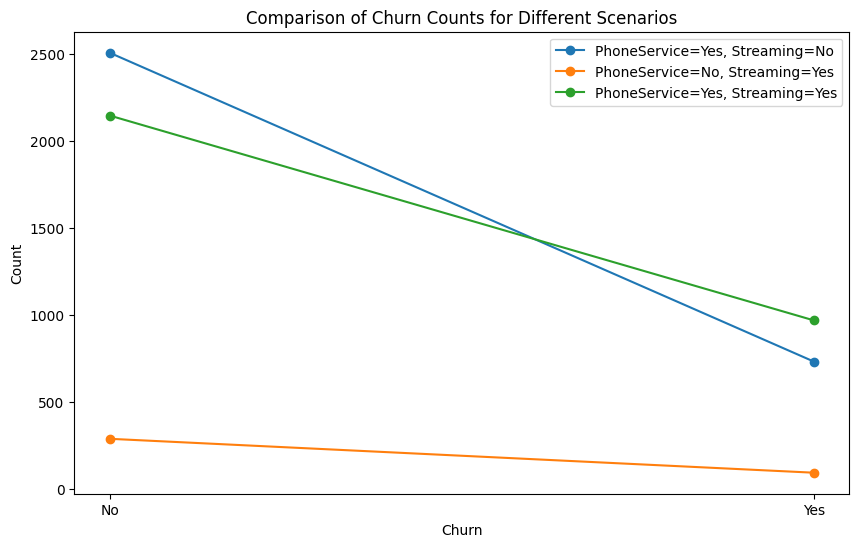

In [20]:


# Count the occurrences of "Yes" and "No" values for each subset
counts_phone_yes_stream_no = phone_yes_stream_no['Churn'].value_counts()
counts_phone_no_stream_yes = phone_no_stream_yes['Churn'].value_counts()
counts_phone_yes_stream_yes = phone_yes_stream_yes['Churn'].value_counts()

# Create a line plot to compare the counts
plt.figure(figsize=(10, 6))

plt.plot(counts_phone_yes_stream_no.index, counts_phone_yes_stream_no.values, marker='o', label='PhoneService=Yes, Streaming=No')
plt.plot(counts_phone_no_stream_yes.index, counts_phone_no_stream_yes.values, marker='o', label='PhoneService=No, Streaming=Yes')
plt.plot(counts_phone_yes_stream_yes.index, counts_phone_yes_stream_yes.values, marker='o', label='PhoneService=Yes, Streaming=Yes')

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Comparison of Churn Counts for Different Scenarios')
plt.legend()

plt.show()


The lowest churn rate is for customers who are only buying the Streaming Services.

The highest churn rate is for customers buying both the Services.

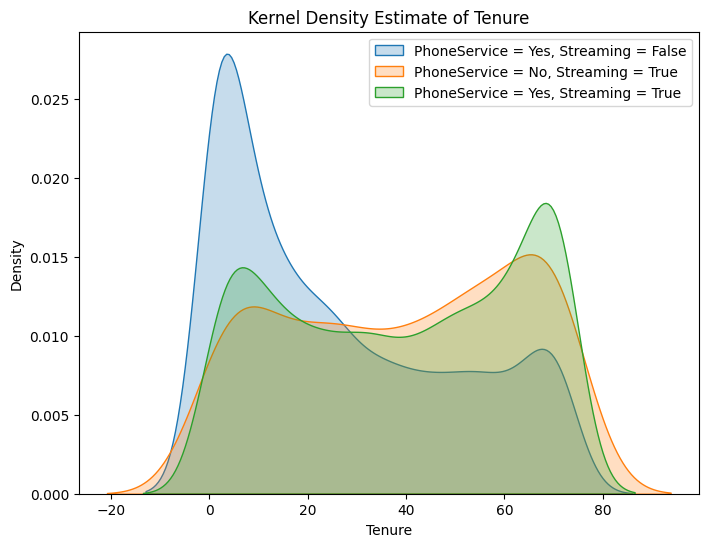

In [21]:


# Filter the DataFrame for subsets based on conditions
phone_yes_stream_no = telecom[(telecom['PhoneService'] == 'Yes') & (telecom['streaming'] == False)]
phone_no_stream_yes = telecom[(telecom['PhoneService'] == 'No') & (telecom['streaming'] == True)]
phone_yes_stream_yes = telecom[(telecom['PhoneService'] == 'Yes') & (telecom['streaming'] == True)]


plt.figure(figsize=(8, 6))

# KDE for PhoneService == Yes and streaming == False
sns.kdeplot(data=phone_yes_stream_no, x='tenure', label='PhoneService = Yes, Streaming = False', fill=True)

# KDE for PhoneService == No and streaming == True
sns.kdeplot(data=phone_no_stream_yes, x='tenure', label='PhoneService = No, Streaming = True', fill=True)

# KDE for PhoneService == Yes and streaming == True
sns.kdeplot(data=phone_yes_stream_yes, x='tenure', label='PhoneService = Yes, Streaming = True', fill=True)

# Adding labels and title
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Tenure')

# Show legend
plt.legend()

# Displaying the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


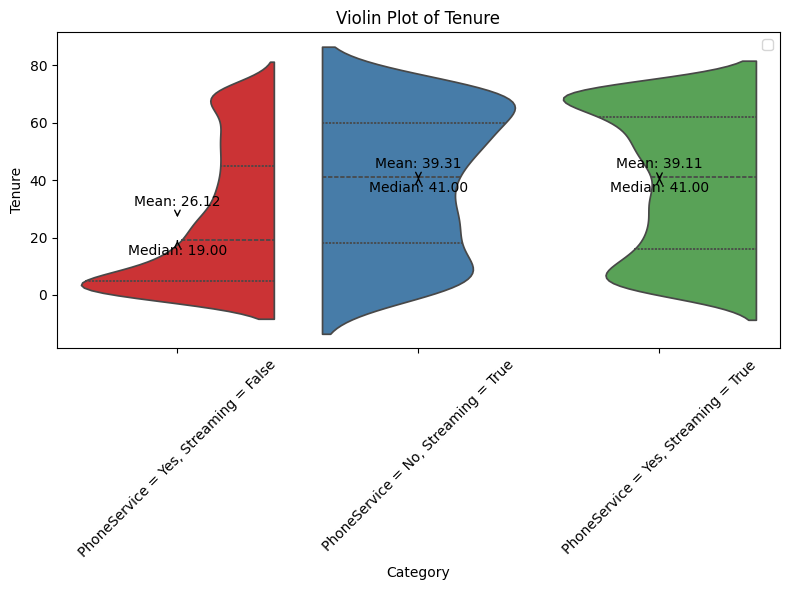

In [29]:


# Filter the DataFrame for subsets based on conditions
phone_yes_stream_no = telecom[(telecom['PhoneService'] == 'Yes') & (telecom['streaming'] == False)]
phone_no_stream_yes = telecom[(telecom['PhoneService'] == 'No') & (telecom['streaming'] == True)]
phone_yes_stream_yes = telecom[(telecom['PhoneService'] == 'Yes') & (telecom['streaming'] == True)]

# Combine all subsets into a single DataFrame
combined_data = pd.concat([phone_yes_stream_no.assign(category='PhoneService = Yes, Streaming = False'),
                           phone_no_stream_yes.assign(category='PhoneService = No, Streaming = True'),
                           phone_yes_stream_yes.assign(category='PhoneService = Yes, Streaming = True')])

# Plotting the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=combined_data, x='category', y='tenure', hue='category', split=True, inner='quartile', palette='Set1')
plt.xlabel('Category')
plt.ylabel('Tenure')
plt.title('Violin Plot of Tenure')
plt.legend(loc='upper right')

# Rotate x-axis tick labels
plt.xticks(rotation=45)

# Annotate with mean and median values for each category
for i, category in enumerate(combined_data['category'].unique()):
    mean_value = combined_data[combined_data['category'] == category]['tenure'].mean()
    median_value = combined_data[combined_data['category'] == category]['tenure'].median()
    plt.annotate(f'Mean: {mean_value:.2f}', xy=(i, mean_value), xytext=(i, mean_value + 5),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
    plt.annotate(f'Median: {median_value:.2f}', xy=(i, median_value), xytext=(i, median_value - 5),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')

plt.tight_layout()
plt.show()


The longer a customer's tenure period is, the more revenue they have generated.

So, generated revenue follows the trend by:

1. Buy only the Streaming Services (Max.)

2. Buy only phone service (Min.)

In [76]:

# Filter subsets based on conditions
phone_yes_stream_no = telecom[(telecom['PhoneService'] == 'Yes') & (telecom['streaming'] == 0)]
phone_no_stream_yes = telecom[(telecom['PhoneService'] == 'No') & (telecom['streaming'] == 1)]
phone_yes_stream_yes = telecom[(telecom['PhoneService'] == 'Yes') & (telecom['streaming'] == 1)]

# Calculate churn counts for each subset
phone_yes_stream_no_churn_counts = phone_yes_stream_no['Churn'].value_counts()
phone_no_stream_yes_churn_counts = phone_no_stream_yes['Churn'].value_counts()
phone_yes_stream_yes_churn_counts = phone_yes_stream_yes['Churn'].value_counts()

# Plotting pie chart for each subset
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pie(phone_yes_stream_no_churn_counts, labels=phone_yes_stream_no_churn_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Churn Distribution\n(Only PhoneService)')

plt.subplot(1, 3, 2)
plt.pie(phone_no_stream_yes_churn_counts, labels=phone_no_stream_yes_churn_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Churn Distribution\n(Only StreamingService)')

plt.subplot(1, 3, 3)
plt.pie(phone_yes_stream_yes_churn_counts, labels=phone_yes_stream_yes_churn_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

# Annotate each pie chart with count and percentage using arrows
for i, subset in enumerate([phone_yes_stream_no, phone_no_stream_yes, phone_yes_stream_yes]):
    churn_counts = subset['Churn'].value_counts()
    plt.annotate(f'Churned: {churn_counts[1]} ({churn_counts[1] / churn_counts.sum() * 100:.1f}%)',
                 xy=(0.5, 0.5), xytext=(0.2, 0.2), fontsize=10, color='black',
                 arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
    plt.annotate(f'Not Churned: {churn_counts[0]} ({churn_counts[0] / churn_counts.sum() * 100:.1f}%)',
                 xy=(0.5, 0.4), xytext=(0.2, 0.1), fontsize=10, color='black',
                 arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')

plt.tight_layout()
plt.show()


c:\Program Files\Python312\Lib\site-packages\matplotlib\axes\_axes.py:3232: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 1500x500 with 1 Axes>

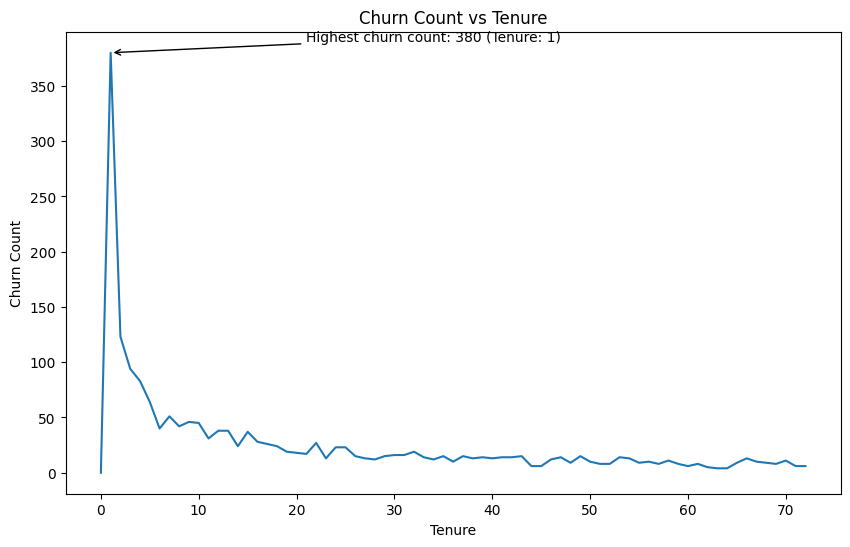

In [56]:
# Group by 'tenure' and count churn occurrences
churn_count = telecom.groupby('tenure')['Churn'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Churn_Count')

# Find the highest churn count and its corresponding tenure value
max_churn_count = churn_count['Churn_Count'].max()
max_churn_tenure = churn_count.loc[churn_count['Churn_Count'].idxmax(), 'tenure']

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_count, x='tenure', y='Churn_Count')
plt.title('Churn Count vs Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Count')

# Annotating the highest churn count
plt.annotate(f'Highest churn count: {max_churn_count} (Tenure: {max_churn_tenure})',
             xy=(max_churn_tenure, max_churn_count),
             xytext=(max_churn_tenure + 20, max_churn_count + 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()


Most Customers are lost during the first year, work on developing brand loyalty during this period, by giving offers etc.

<Figure size 1000x600 with 0 Axes>

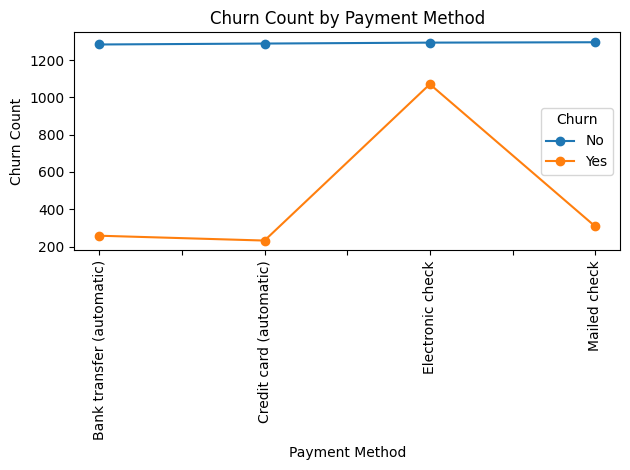

In [26]:


# Group by 'PaymentMethod' and count churn occurrences
churn_count = telecom.groupby('PaymentMethod')['Churn'].value_counts().unstack()


plt.figure(figsize=(10, 6))
churn_count.plot(kind='line', marker='o')


plt.title('Churn Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Count')


plt.legend(title='Churn')

plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


The company tends to loose most customers paying through Electronic Checks.

In [61]:
telecom['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

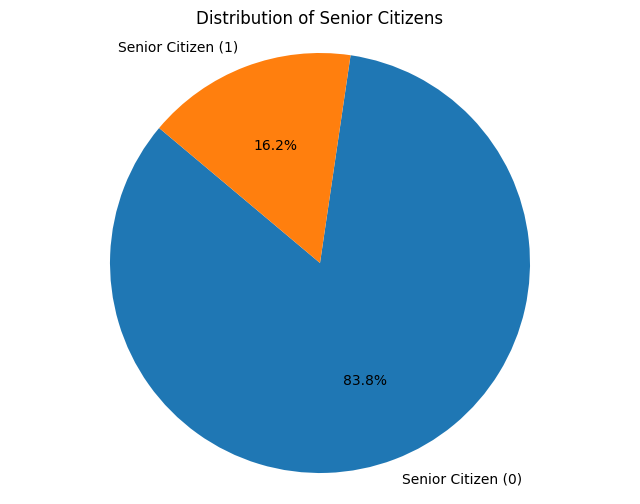

In [63]:
# Data
labels = ['Senior Citizen (0)', 'Senior Citizen (1)']
sizes = [5901, 1142]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Distribution of Senior Citizens')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()


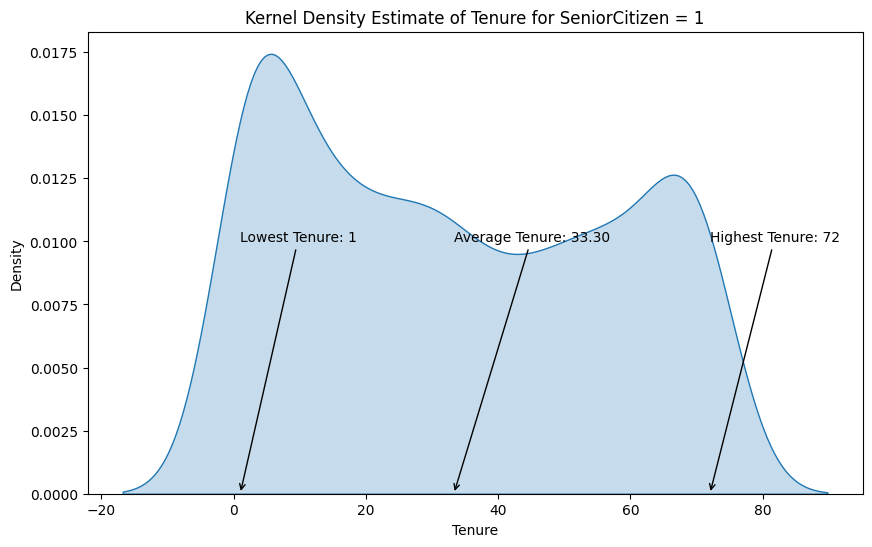

In [30]:

# Filter the dataframe for SeniorCitizen == 1
senior = telecom[telecom['SeniorCitizen'] == 1]

# Plotting the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=senior, x='tenure', fill=True)

# Annotate the highest and lowest tenures
max_tenure = senior['tenure'].max()
min_tenure = senior['tenure'].min()
average_tenure = senior['tenure'].mean()

plt.annotate(f'Highest Tenure: {max_tenure}', xy=(max_tenure, 0), xytext=(max_tenure, 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Lowest Tenure: {min_tenure}', xy=(min_tenure, 0), xytext=(min_tenure, 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Average Tenure: {average_tenure:.2f}', xy=(average_tenure, 0), xytext=(average_tenure, 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Adding labels and title
plt.title('Kernel Density Estimate of Tenure for SeniorCitizen = 1')
plt.xlabel('Tenure')
plt.ylabel('Density')

plt.show()


Based on the tenure duration, appropriate customer retention measures can be taken.

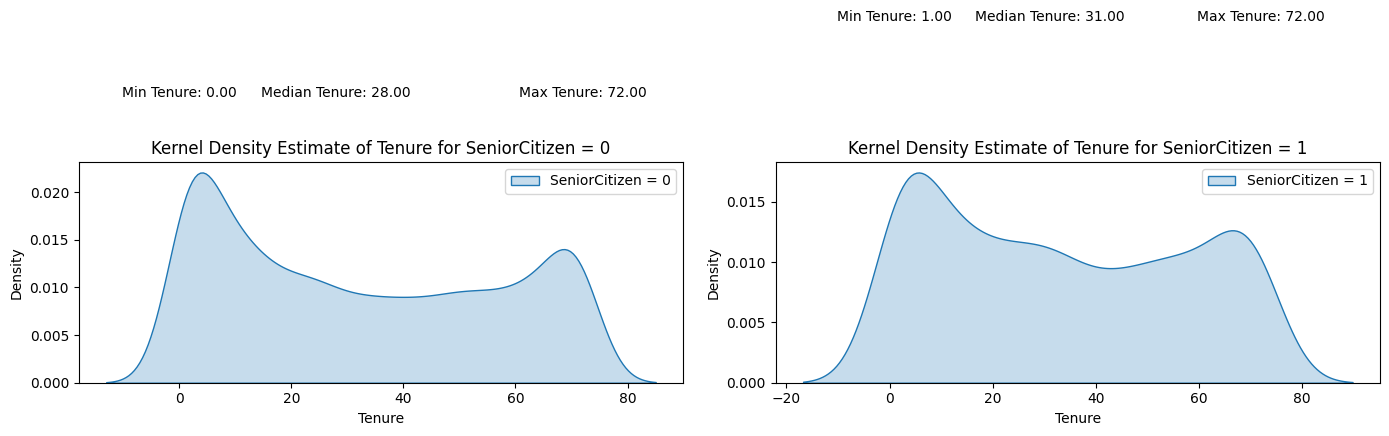

In [75]:


# Create subsets based on conditions
senior_citizen_0 = telecom[telecom['SeniorCitizen'] == 0]
senior_citizen_1 = telecom[telecom['SeniorCitizen'] == 1]

# Plot KDEs for subsets
plt.figure(figsize=(14, 6))

# KDE for SeniorCitizen == 0
plt.subplot(1, 2, 1)
sns.kdeplot(data=senior_citizen_0, x='tenure', label='SeniorCitizen = 0', fill=True)

# Annotate SeniorCitizen == 0
median_tenure_senior_citizen_0 = senior_citizen_0['tenure'].median()
plt.text(median_tenure_senior_citizen_0, 0.03, f'Median Tenure: {median_tenure_senior_citizen_0:.2f}', ha='center')

min_tenure_senior_citizen_0 = senior_citizen_0['tenure'].min()
plt.text(min_tenure_senior_citizen_0, 0.03, f'Min Tenure: {min_tenure_senior_citizen_0:.2f}', ha='center')

max_tenure_senior_citizen_0 = senior_citizen_0['tenure'].max()
plt.text(max_tenure_senior_citizen_0, 0.03, f'Max Tenure: {max_tenure_senior_citizen_0:.2f}', ha='center')


# Adding labels and title for SeniorCitizen == 0
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Tenure for SeniorCitizen = 0')
plt.legend()

# KDE for SeniorCitizen == 1
plt.subplot(1, 2, 2)
sns.kdeplot(data=senior_citizen_1, x='tenure', label='SeniorCitizen = 1', fill=True)

# Annotate SeniorCitizen == 1
median_tenure_senior_citizen_1 = senior_citizen_1['tenure'].median()
plt.text(median_tenure_senior_citizen_1, 0.03, f'Median Tenure: {median_tenure_senior_citizen_1:.2f}', ha='center')

min_tenure_senior_citizen_1 = senior_citizen_1['tenure'].min()
plt.text(min_tenure_senior_citizen_1, 0.03, f'Min Tenure: {min_tenure_senior_citizen_1:.2f}', ha='center')

max_tenure_senior_citizen_1 = senior_citizen_1['tenure'].max()
plt.text(max_tenure_senior_citizen_1, 0.03, f'Max Tenure: {max_tenure_senior_citizen_1:.2f}', ha='center')

# Adding labels and title for SeniorCitizen == 1
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Tenure for SeniorCitizen = 1')
plt.legend()

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()


Senior Citizens tend to stay for a longer tenure on an average.

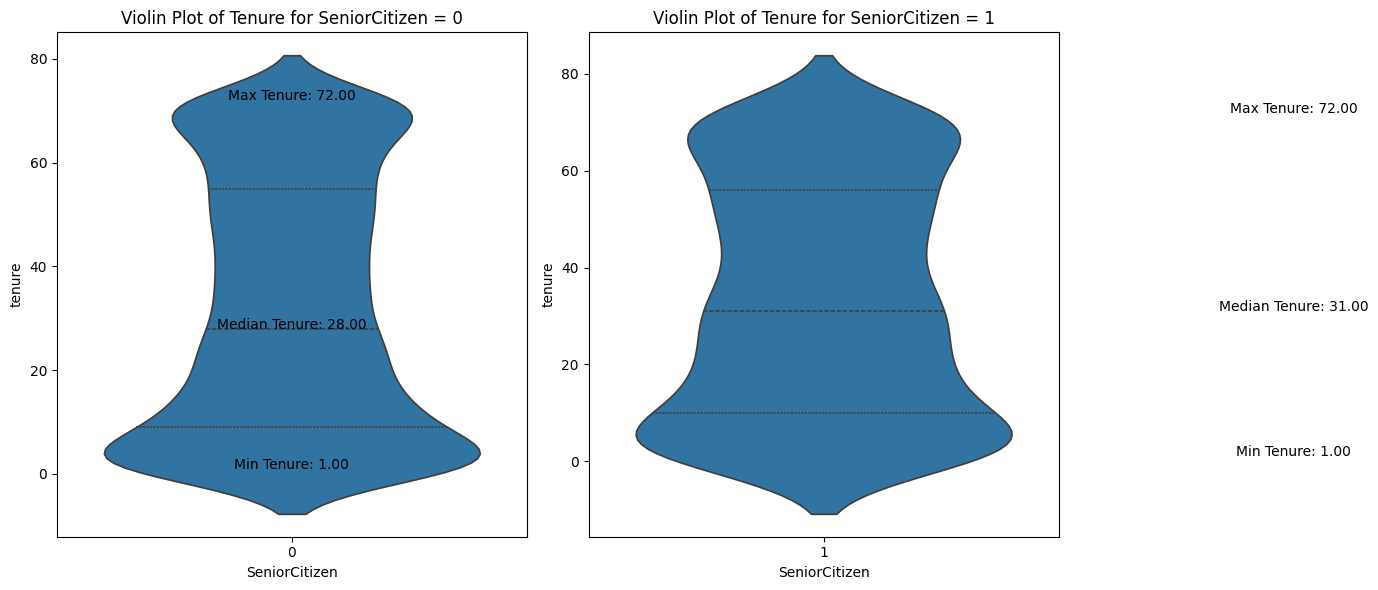

In [75]:

senior_citizen_0 = telecom[telecom['SeniorCitizen'] == 0]
senior_citizen_1 = telecom[telecom['SeniorCitizen'] == 1]

# Plot violin plots for subsets
plt.figure(figsize=(14, 6))

# Violin plot for SeniorCitizen == 0
plt.subplot(1, 2, 1)
sns.violinplot(data=senior_citizen_0, x='SeniorCitizen', y='tenure', inner='quartile')
plt.title('Violin Plot of Tenure for SeniorCitizen = 0')

# Annotate SeniorCitizen == 0
median_tenure_senior_citizen_0 = senior_citizen_0['tenure'].median()
plt.text(0, median_tenure_senior_citizen_0, f'Median Tenure: {median_tenure_senior_citizen_0:.2f}', ha='center')

min_tenure_senior_citizen_0 = senior_citizen_0['tenure'].min()
plt.text(0, min_tenure_senior_citizen_0, f'Min Tenure: {min_tenure_senior_citizen_0:.2f}', ha='center')

max_tenure_senior_citizen_0 = senior_citizen_0['tenure'].max()
plt.text(0, max_tenure_senior_citizen_0, f'Max Tenure: {max_tenure_senior_citizen_0:.2f}', ha='center')

# Violin plot for SeniorCitizen == 1
plt.subplot(1, 2, 2)
sns.violinplot(data=senior_citizen_1, x='SeniorCitizen', y='tenure', inner='quartile')
plt.title('Violin Plot of Tenure for SeniorCitizen = 1')

# Annotate SeniorCitizen == 1
median_tenure_senior_citizen_1 = senior_citizen_1['tenure'].median()
plt.text(1, median_tenure_senior_citizen_1, f'Median Tenure: {median_tenure_senior_citizen_1:.2f}', ha='center')

min_tenure_senior_citizen_1 = senior_citizen_1['tenure'].min()
plt.text(1, min_tenure_senior_citizen_1, f'Min Tenure: {min_tenure_senior_citizen_1:.2f}', ha='center')

max_tenure_senior_citizen_1 = senior_citizen_1['tenure'].max()
plt.text(1, max_tenure_senior_citizen_1, f'Max Tenure: {max_tenure_senior_citizen_1:.2f}', ha='center')

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()
